In [57]:
from google_play_scraper import reviews, Sort

app_id = 'cw.co.id'

def get_reviews(app_id, lang='id', count=1500, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")



Jumlah ulasan: 1301
Contoh ulasan:
{'reviewId': '1dac0775-0749-473f-92e2-063bb333a530', 'userName': 'Moch alfutu Dinata Hukum 22', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIZ8lKCemYLXw-4d9ZSHoYq1gVxSdGuwUDJ2eF4Kirjj8E5Vg=mo', 'content': 'top', 'score': 4, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.3.2', 'at': datetime.datetime(2025, 7, 14, 14, 12), 'replyContent': None, 'repliedAt': None, 'appVersion': '1.3.2'}


In [62]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_persib.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Ulasan berhasil disimpan ke {file_name}")
    else:
        print("Tidak ada ulasan yang ditemukan.")

# Panggil fungsi
export_to_csv(reviews)


Ulasan berhasil disimpan ke hasil_scraper_ulasan_app_persib.csv


In [63]:
import pandas as pd

df = pd.read_csv('hasil_scraper_ulasan_app_persib.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1301 non-null   object
 1   Username     1301 non-null   object
 2   Rating       1301 non-null   int64 
 3   Review Text  1301 non-null   object
 4   Date         1301 non-null   object
dtypes: int64(1), object(4)
memory usage: 50.9+ KB


In [64]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_persib.csv')
data.head(5)


,Review ID,Username,Rating,Review Text,Date
0,1dac0775-0749-473f-92e2-063bb333a530,Moch alfutu Dinata Hukum 22,4,top,2025-07-14 14:12:00
1,5826a53c-d39f-499a-9fb3-24e4dcd2ece2,M JAY GAMING,5,sangat bermanfaat terimakasih,2025-07-14 14:02:04
2,5768e2a7-28b7-4c94-a7bc-64c89ba93c1e,Ari Fianto,5,saya sangat percaya dan terimakasih,2025-07-14 11:27:33
3,04831537-fd87-4bc1-8931-0124a58e1146,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,2025-07-14 03:00:25
4,abd98482-8dd3-4fc4-bd4d-1ce147cf0843,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,2025-07-13 23:01:50


In [65]:
import pandas as pd
data = pd.read_csv('hasil_scraper_ulasan_app_persib.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1301 non-null   object
 1   Username     1301 non-null   object
 2   Rating       1301 non-null   int64 
 3   Review Text  1301 non-null   object
 4   Date         1301 non-null   object
dtypes: int64(1), object(4)
memory usage: 50.9+ KB


In [66]:
data.head(2)

,Review ID,Username,Rating,Review Text,Date
0,1dac0775-0749-473f-92e2-063bb333a530,Moch alfutu Dinata Hukum 22,4,top,2025-07-14 14:12:00
1,5826a53c-d39f-499a-9fb3-24e4dcd2ece2,M JAY GAMING,5,sangat bermanfaat terimakasih,2025-07-14 14:02:04


In [67]:
df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text']])
df.head(5)


,Date,Username,Rating,Review Text
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1301 non-null   object
 1   Username     1301 non-null   object
 2   Rating       1301 non-null   int64 
 3   Review Text  1301 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.8+ KB


In [69]:
df.drop_duplicates(subset="Review Text", keep='first', inplace=True)


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1300
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1247 non-null   object
 1   Username     1247 non-null   object
 2   Rating       1247 non-null   int64 
 3   Review Text  1247 non-null   object
dtypes: int64(1), object(3)
memory usage: 48.7+ KB


In [71]:
df.head(2)

,Date,Username,Rating,Review Text
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih


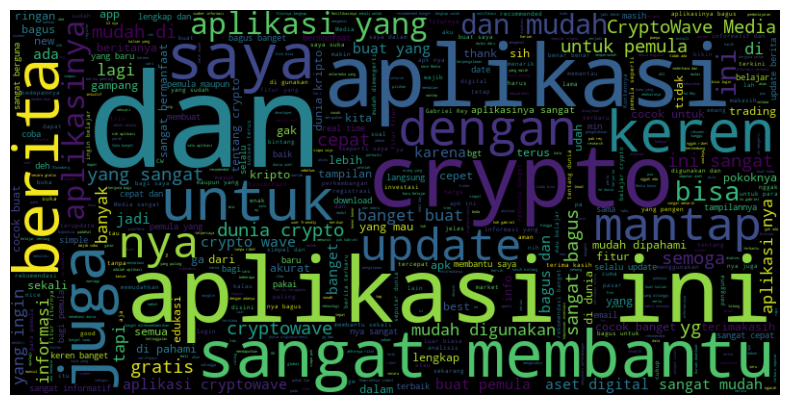

In [72]:
#  sebelum preprocesing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


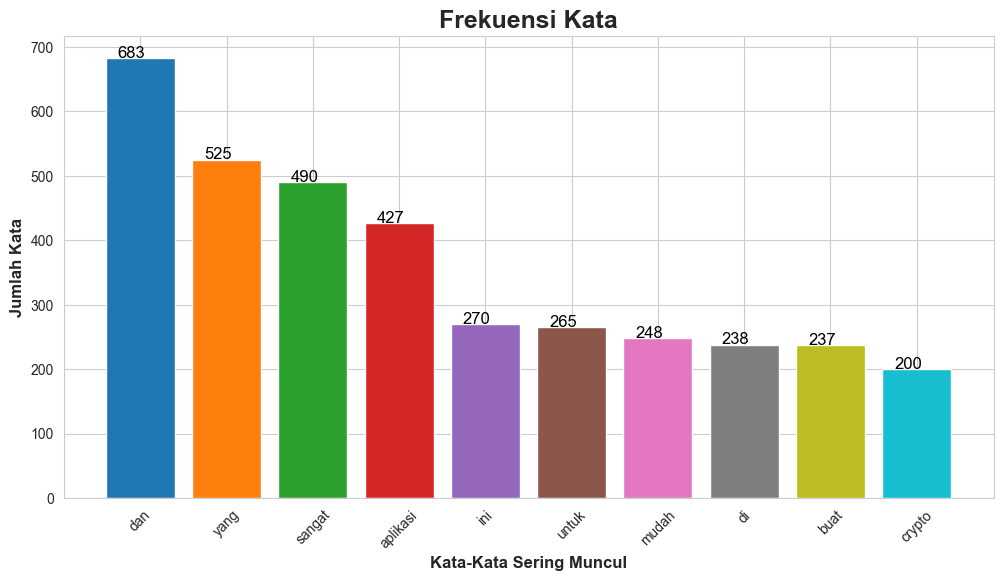

In [74]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks ulasan
text = " ".join(df["Review Text"])

# Tokenisasi dan hitung frekuensi kata
tokens = text.split()
word_counts = Counter(tokens)

# Ambil 10 kata yang paling sering muncul
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Buat plot bar
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num),
             fontsize=12, color='black', ha='center')

plt.show()


In [75]:
import re  # Tambahkan baris ini
def remove_URL(text):
    return re.sub(r"http\S+|www.\S+", "", text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("[" 
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U00002702-\U000027B0"
            u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

# Terapkan ke dataframe
df['cleaning'] = df['Review Text'].apply(remove_URL)
df['cleaning'] = df['cleaning'].apply(remove_html)
df['cleaning'] = df['cleaning'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(remove_symbols)
df['cleaning'] = df['cleaning'].apply(remove_numbers)

df.head(10)


,Date,Username,Rating,Review Text,cleaning
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...
5,2025-07-13 22:20:51,Alya Nidaulkarimah,1,eror registrasi tolong diperbaiki,eror registrasi tolong diperbaiki
6,2025-07-13 21:21:47,darjat lugina,5,cocok untuk pemula yang ingin menggeluti dunia...,cocok untuk pemula yang ingin menggeluti dunia...
7,2025-07-13 21:17:51,FATIMAH,5,banyak manfaat nya dan pembelajaran nya bagi k...,banyak manfaat nya dan pembelajaran nya bagi k...
8,2025-07-13 21:17:45,Growto Din,5,Aplikasi CryptoWave Media sangat membantu saya...,Aplikasi CryptoWave Media sangat membantu saya...
9,2025-07-13 21:12:49,Birumuda 666,5,aplikasi mudah di mengerti untuk pemula ini si...,aplikasi mudah di mengerti untuk pemula ini si...


In [77]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...


In [86]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    # Perhatikan: fungsi hash() bawaan Python akan digunakan di sini.
                    # Jika 'hash' adalah fungsi kustom, pastikan sudah didefinisikan di tempat lain.
                    kata_tidak_baku_hash.append(hash(word)) 
                # else:
                    # Baris-baris ini dikomentari di tangkapan layar asli.
                    # replaced_words.append('<karakter eksplisit>')
                    # kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ""
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [87]:
# Baca dataset
data = pd.DataFrame(df[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...


In [88]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))


In [89]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = \
zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# data.head(100) # Ini dikomentari di screenshot asli

df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])

df.head(20)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...
5,2025-07-13 22:20:51,Alya Nidaulkarimah,1,eror registrasi tolong diperbaiki,eror registrasi tolong diperbaiki,eror registrasi tolong diperbaiki,eror registrasi tolong diperbaiki
6,2025-07-13 21:21:47,darjat lugina,5,cocok untuk pemula yang ingin menggeluti dunia...,cocok untuk pemula yang ingin menggeluti dunia...,cocok untuk pemula yang ingin menggeluti dunia...,cocok untuk pemula yang ingin menggeluti dunia...
7,2025-07-13 21:17:51,FATIMAH,5,banyak manfaat nya dan pembelajaran nya bagi k...,banyak manfaat nya dan pembelajaran nya bagi k...,banyak manfaat nya dan pembelajaran nya bagi k...,banyak manfaat ya dan pembelajaran ya bagi kau...
8,2025-07-13 21:17:45,Growto Din,5,Aplikasi CryptoWave Media sangat membantu saya...,Aplikasi CryptoWave Media sangat membantu saya...,aplikasi cryptowave media sangat membantu saya...,aplikasi cryptowave media sangat membantu saya...
9,2025-07-13 21:12:49,Birumuda 666,5,aplikasi mudah di mengerti untuk pemula ini si...,aplikasi mudah di mengerti untuk pemula ini si...,aplikasi mudah di mengerti untuk pemula ini si...,aplikasi mudah di mengerti untuk pemula ini si...


In [90]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,[top]
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"[sangat, bermanfaat, terimakasih]"
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"[saya, sangat, percaya, dan, terimakasih]"
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"[sangat, membantu, untuk, belajar, tentang, cr..."
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"[wow, bagus, aplikasinya, mudah, di, pahami, d..."


In [91]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Hanya perlu dijalankan sekali
stop_words = stopwords.words('indonesian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,[top],[top]
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"[sangat, bermanfaat, terimakasih]","[bermanfaat, terimakasih]"
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"[saya, sangat, percaya, dan, terimakasih]","[percaya, terimakasih]"
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"[sangat, membantu, untuk, belajar, tentang, cr...","[membantu, belajar, crypto]"
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"[wow, bagus, aplikasinya, mudah, di, pahami, d...","[wow, bagus, aplikasinya, mudah, pahami, enak,..."


In [93]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [94]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,[top],[top],top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"[sangat, bermanfaat, terimakasih]","[bermanfaat, terimakasih]",manfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"[saya, sangat, percaya, dan, terimakasih]","[percaya, terimakasih]",percaya terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"[sangat, membantu, untuk, belajar, tentang, cr...","[membantu, belajar, crypto]",bantu ajar crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"[wow, bagus, aplikasinya, mudah, di, pahami, d...","[wow, bagus, aplikasinya, mudah, pahami, enak,...",wow bagus aplikasi mudah paham enak hp kentang...


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1247 non-null   object
 1   Username          1247 non-null   object
 2   Rating            1247 non-null   int64 
 3   Review Text       1247 non-null   object
 4   cleaning          1247 non-null   object
 5   case_folding      1247 non-null   object
 6   normalisasi       1247 non-null   object
 7   tokenize          1247 non-null   object
 8   stopword removal  1247 non-null   object
 9   steming_data      1247 non-null   object
dtypes: int64(1), object(9)
memory usage: 107.2+ KB


In [96]:
df.to_csv('Hasil_Preprosessing_Data.csv', encoding='utf8', index=False)

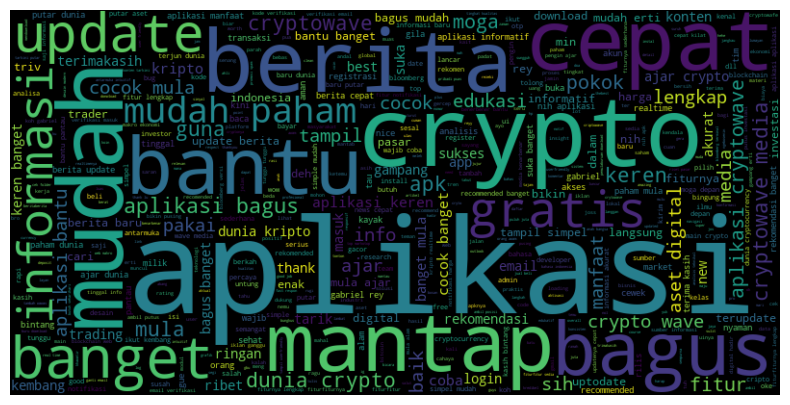

In [97]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'yang', 'dan', '...', 'ini','ya','dan','nya','buat','pas'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

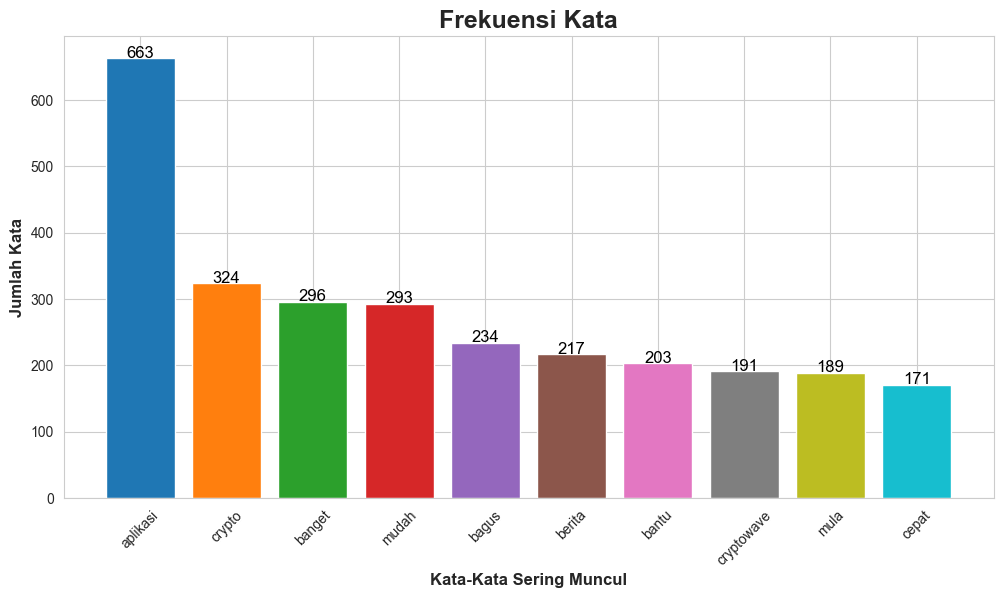

In [98]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(df["steming_data"])

# Tambahkan kata-kata stopwords khusus
stopwords = set(STOPWORDS)
stopwords.update(['https', 'yang', 'di', '...', 'dan', 'ya', 'ini', 'nya', 'buat', 'pas'])

# Tokenisasi dan hapus stopwords
tokens = [word for word in text.split() if word not in stopwords]

# Hitung frekuensi kata
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Plot
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


In [99]:
# LABELLING DATA LEXICON BASED
import pandas as pd

data = pd.read_csv("Hasil_Preprosessing_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,['top'],['top'],top
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"['sangat', 'bermanfaat', 'terimakasih']","['bermanfaat', 'terimakasih']",manfaat terimakasih
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"['saya', 'sangat', 'percaya', 'dan', 'terimaka...","['percaya', 'terimakasih']",percaya terimakasih
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"['sangat', 'membantu', 'untuk', 'belajar', 'te...","['membantu', 'belajar', 'crypto']",bantu ajar crypto
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"['wow', 'bagus', 'aplikasinya', 'mudah', 'di',...","['wow', 'bagus', 'aplikasinya', 'mudah', 'paha...",wow bagus aplikasi mudah paham enak hp kentang...


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1247 non-null   object
 1   Username          1247 non-null   object
 2   Rating            1247 non-null   int64 
 3   Review Text       1247 non-null   object
 4   cleaning          1238 non-null   object
 5   case_folding      1238 non-null   object
 6   normalisasi       1237 non-null   object
 7   tokenize          1247 non-null   object
 8   stopword removal  1247 non-null   object
 9   steming_data      1235 non-null   object
dtypes: int64(1), object(9)
memory usage: 97.6+ KB


In [101]:
df = data.dropna()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1235 non-null   object
 1   Username          1235 non-null   object
 2   Rating            1235 non-null   int64 
 3   Review Text       1235 non-null   object
 4   cleaning          1235 non-null   object
 5   case_folding      1235 non-null   object
 6   normalisasi       1235 non-null   object
 7   tokenize          1235 non-null   object
 8   stopword removal  1235 non-null   object
 9   steming_data      1235 non-null   object
dtypes: int64(1), object(9)
memory usage: 106.1+ KB


In [103]:
print("Kolom yang tersedia:", df.columns.tolist())


Kolom yang tersedia: ['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi', 'tokenize', 'stopword removal', 'steming_data']


In [106]:
# Labeling berdasarkan skor bintang
def label_from_score(score):
    if score in [1, 2]:
        return "Negatif"
    elif score == 3:
        return "Netral"
    elif score in [4, 5]:
        return "Positif"
    else:
        return None  # Untuk nilai tidak valid
    

df['Sentiment'] = df['Rating'].apply(label_from_score)

df.head()






# import pandas as pd

# # Fungsi untuk menentukan sentimen
# def determine_sentiment(text):
#     positive_count = sum(1 for word in text.split() if word in positive_lexicon)
#     negative_count = sum(1 for word in text.split() if word in negative_lexicon)
#     if positive_count > negative_count:
#         return "Positif"
#     elif positive_count < negative_count:
#         return "Negatif"
#     else:
#         # Jika jumlah positif dan negatif sama, atau keduanya nol
#         return None  # Mengembalikan None untuk ditangani oleh fungsi berikutnya

# # Baca kamus leksikon positif dan negatif
# positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
# negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# def replace_none_sentiment(sentiments):
#     # Inisialisasi replace_flag untuk pergantian sentimen
#     # Asumsi awal sentimen yang diganti adalah "Positif"
#     replace_flag = "Positif"
#     for i in range(len(sentiments)):
#         if sentiments[i] is None:
#             sentiments[i] = replace_flag
#             # Ganti flag untuk pergantian berikutnya
#             replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
#     return sentiments

# df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
# df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

# df.head() # Menggunakan df.head() tanpa argumen akan menampilkan 5 baris pertama secara default






# import pandas as pd

# # Baca kamus leksikon positif dan negatif
# positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
# negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# # Fungsi untuk menentukan sentimen
# def determine_sentiment(text):
#     positive_count = sum(1 for word in text.split() if word in positive_lexicon)
#     negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    
#     if positive_count > negative_count:
#         return "Positif"
#     elif positive_count < negative_count:
#         return "Negatif"
#     else:
#         return "Netral"

# # Terapkan ke DataFrame
# df['Sentiment'] = df['steming_data'].apply(determine_sentiment)

# # Tampilkan hasil
# df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1252\640667195.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Rating'].apply(label_from_score)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,['top'],['top'],top,Positif
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"['sangat', 'bermanfaat', 'terimakasih']","['bermanfaat', 'terimakasih']",manfaat terimakasih,Positif
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"['saya', 'sangat', 'percaya', 'dan', 'terimaka...","['percaya', 'terimakasih']",percaya terimakasih,Positif
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"['sangat', 'membantu', 'untuk', 'belajar', 'te...","['membantu', 'belajar', 'crypto']",bantu ajar crypto,Positif
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"['wow', 'bagus', 'aplikasinya', 'mudah', 'di',...","['wow', 'bagus', 'aplikasinya', 'mudah', 'paha...",wow bagus aplikasi mudah paham enak hp kentang...,Positif


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1252\376280042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


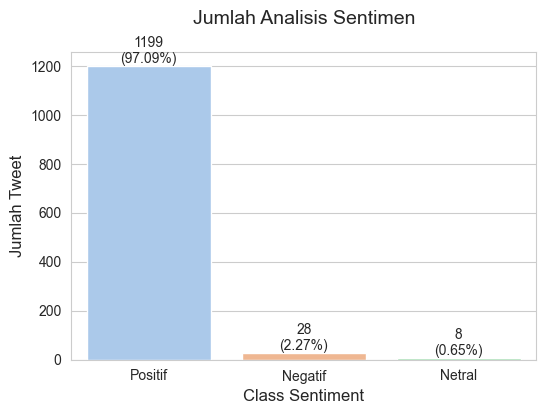

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [108]:
df.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

In [109]:
# MODEL SVM
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,['top'],['top'],top,Positif
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"['sangat', 'bermanfaat', 'terimakasih']","['bermanfaat', 'terimakasih']",manfaat terimakasih,Positif
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"['saya', 'sangat', 'percaya', 'dan', 'terimaka...","['percaya', 'terimakasih']",percaya terimakasih,Positif
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"['sangat', 'membantu', 'untuk', 'belajar', 'te...","['membantu', 'belajar', 'crypto']",bantu ajar crypto,Positif
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"['wow', 'bagus', 'aplikasinya', 'mudah', 'di',...","['wow', 'bagus', 'aplikasinya', 'mudah', 'paha...",wow bagus aplikasi mudah paham enak hp kentang...,Positif


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1235 non-null   object
 1   Username          1235 non-null   object
 2   Rating            1235 non-null   int64 
 3   Review Text       1235 non-null   object
 4   cleaning          1235 non-null   object
 5   case_folding      1235 non-null   object
 6   normalisasi       1235 non-null   object
 7   tokenize          1235 non-null   object
 8   stopword removal  1235 non-null   object
 9   steming_data      1235 non-null   object
 10  Sentiment         1235 non-null   object
dtypes: int64(1), object(10)
memory usage: 106.3+ KB


In [111]:
df = data.dropna()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1235 non-null   object
 1   Username          1235 non-null   object
 2   Rating            1235 non-null   int64 
 3   Review Text       1235 non-null   object
 4   cleaning          1235 non-null   object
 5   case_folding      1235 non-null   object
 6   normalisasi       1235 non-null   object
 7   tokenize          1235 non-null   object
 8   stopword removal  1235 non-null   object
 9   steming_data      1235 non-null   object
 10  Sentiment         1235 non-null   object
dtypes: int64(1), object(10)
memory usage: 106.3+ KB


In [113]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [114]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [115]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)


In [116]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 988
Jumlah Data Uji: 247


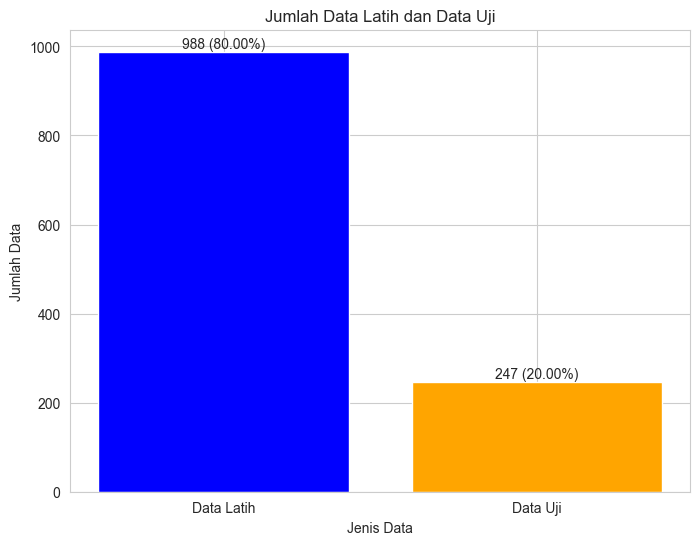

In [117]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, 
             f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [118]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# ditambahkan tanggal 14 juli 2025
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score



In [119]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)





In [121]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

# menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [122]:
# Membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# Membuat dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)



MultinomialNB()

In [123]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

# ditambahkan
y_pred_nb = nb.predict(X_test_vectorized)


In [124]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# Menampilkan confusion matrix dalam angka untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

SVM Confusion Matrix:
[[  0   0   2]
 [  0   0   2]
 [  1   0 242]]
Naive Bayes Confusion Matrix:
[[  0   0   2]
 [  0   0   2]
 [  0   0 243]]


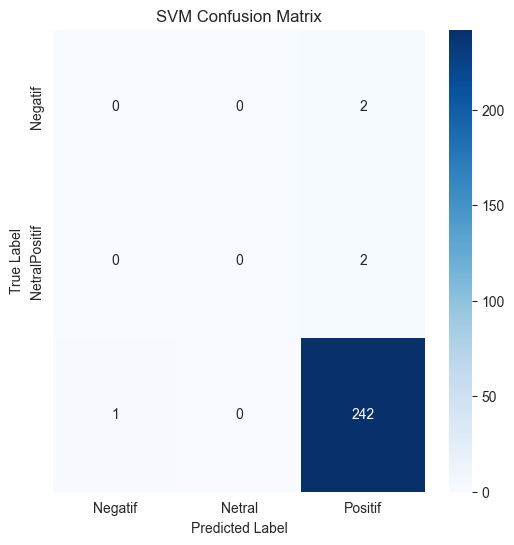

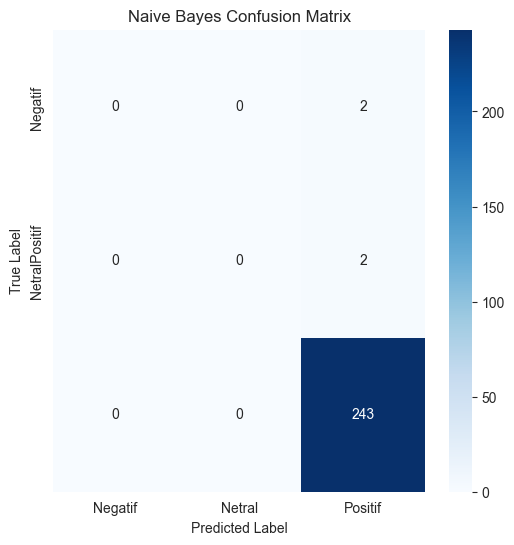

In [125]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negatif', 'Netral', 'Positif'],
                yticklabels=['Negatif', 'Netral' 'Positif'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)
# Plot confusion matrix untuk Naive Bayes
plot_confusion_matrix("Naive Bayes", y_test, y_pred_nb)

In [127]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


# Menampilkan accuracy untuk Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("")

accuracy_nb_percentage = accuracy_nb * 100
print("Naive Bayes Accuracy:", "{:.2f}%".format(accuracy_nb_percentage))
print("")

# Menampilkan classification report untuk Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

SVM Accuracy: 0.979757085020243

SVM Accuracy: 97.98%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
      Netral       0.00      0.00      0.00         2
     Positif       0.98      1.00      0.99       243

    accuracy                           0.98       247
   macro avg       0.33      0.33      0.33       247
weighted avg       0.97      0.98      0.97       247

Naive Bayes Accuracy: 0.9838056680161943

Naive Bayes Accuracy: 98.38%

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
      Netral       0.00      0.00      0.00         2
     Positif       0.98      1.00      0.99       243

    accuracy                           0.98       247
   macro avg       0.33      0.33      0.33       247
weighted avg       0.97      0.98      0.98       247



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [128]:
# ========== LSTM DENGAN TUNING ==========
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import numpy as np

In [130]:
max_words = 10000  # jumlah kata maksimum yang digunakan
max_len = 100

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [131]:
# Encode label
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [132]:
# Jumlah kelas
num_classes = len(np.unique(y_train_enc))

In [133]:
# One-hot encoding label untuk softmax
y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes=num_classes)

In [134]:
# Hitung class weight untuk data tidak seimbang
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_enc),
    y=y_train_enc
)
class_weights_dict = dict(enumerate(class_weights))

In [135]:
# Buat model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [136]:
# Callback early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [139]:
# Training
model.fit(
    X_train_pad, y_train_cat,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9326 - loss: 0.6971 - val_accuracy: 0.8838 - val_loss: 0.3068
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9174 - loss: 0.5606 - val_accuracy: 0.9444 - val_loss: 0.1830
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8940 - loss: 1.2221 - val_accuracy: 0.8737 - val_loss: 0.3724
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8838 - loss: 0.5405 - val_accuracy: 0.8838 - val_loss: 0.2840
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8706 - loss: 0.4980 - val_accuracy: 0.8939 - val_loss: 0.2768


In [140]:
# Evaluasi model
loss, accuracy_lstm = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print("\n✅ LSTM Accuracy: {:.2f}%".format(accuracy_lstm * 100))


✅ LSTM Accuracy: 97.17%


In [141]:
# Prediksi
y_pred_lstm_prob = model.predict(X_test_pad)
y_pred_lstm = y_pred_lstm_prob.argmax(axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


In [142]:
# Confusion matrix dan classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lstm = confusion_matrix(y_test_enc, y_pred_lstm)
print("Confusion Matrix LSTM:")
print(cm_lstm)

Confusion Matrix LSTM:
[[  0   0   2]
 [  1   0   1]
 [  2   1 240]]


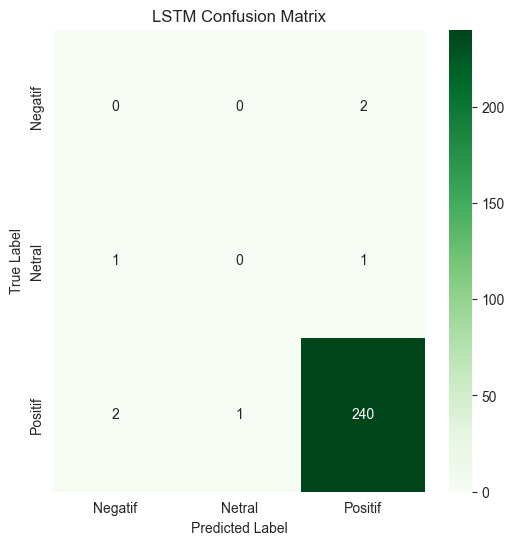

In [143]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [144]:
# Classification report
print("\n✅ LSTM Accuracy: {:.2f}%".format(accuracy_lstm * 100))
print("\nLSTM Classification Report:")
print(classification_report(y_test_enc, y_pred_lstm, target_names=label_encoder.classes_))


✅ LSTM Accuracy: 97.17%

LSTM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         2
      Netral       0.00      0.00      0.00         2
     Positif       0.99      0.99      0.99       243

    accuracy                           0.97       247
   macro avg       0.33      0.33      0.33       247
weighted avg       0.97      0.97      0.97       247



In [145]:
# WORDCLOUD
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-07-14 14:12:00,Moch alfutu Dinata Hukum 22,4,top,top,top,top,['top'],['top'],top,Positif
1,2025-07-14 14:02:04,M JAY GAMING,5,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,sangat bermanfaat terimakasih,"['sangat', 'bermanfaat', 'terimakasih']","['bermanfaat', 'terimakasih']",manfaat terimakasih,Positif
2,2025-07-14 11:27:33,Ari Fianto,5,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,saya sangat percaya dan terimakasih,"['saya', 'sangat', 'percaya', 'dan', 'terimaka...","['percaya', 'terimakasih']",percaya terimakasih,Positif
3,2025-07-14 03:00:25,Bayu April Purwanto,5,sangat membantu untuk belajar tentang crypto 🙏,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,sangat membantu untuk belajar tentang crypto,"['sangat', 'membantu', 'untuk', 'belajar', 'te...","['membantu', 'belajar', 'crypto']",bantu ajar crypto,Positif
4,2025-07-13 23:01:50,Mutiara Amelia,5,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow Bagus Aplikasinya Mudah Di Pahami Dan Enak...,wow bagus aplikasinya mudah di pahami dan enak...,wow bagus aplikasinya mudah di pahami dan enak...,"['wow', 'bagus', 'aplikasinya', 'mudah', 'di',...","['wow', 'bagus', 'aplikasinya', 'mudah', 'paha...",wow bagus aplikasi mudah paham enak hp kentang...,Positif


In [146]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')


In [147]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

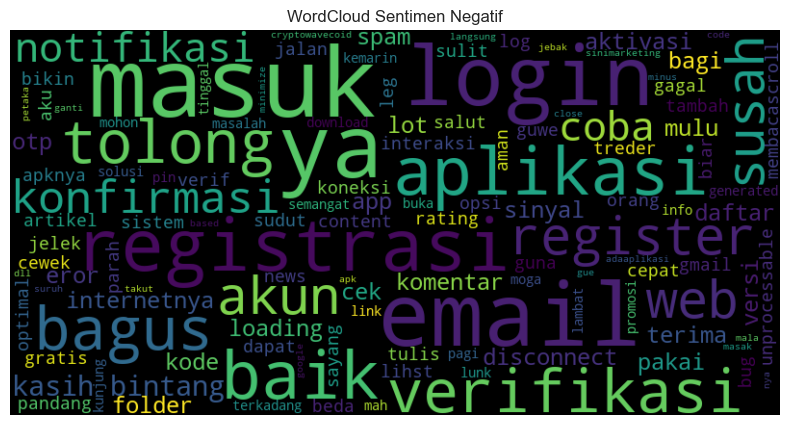

In [148]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')


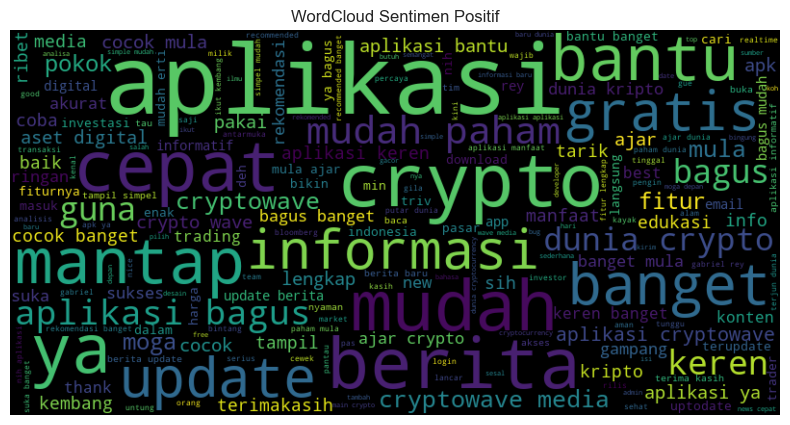

In [149]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

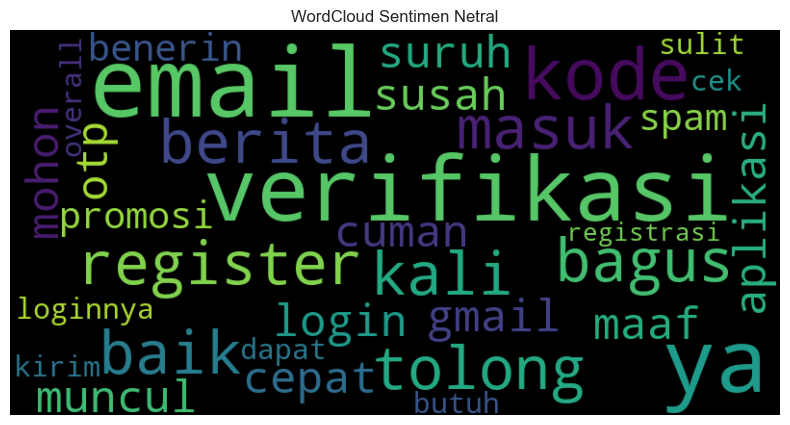

In [150]:
# Membuat WordCloud untuk sentimen netral
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')

In [151]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1235 non-null   object
 1   Username          1235 non-null   object
 2   Rating            1235 non-null   int64 
 3   Review Text       1235 non-null   object
 4   cleaning          1235 non-null   object
 5   case_folding      1235 non-null   object
 6   normalisasi       1235 non-null   object
 7   tokenize          1235 non-null   object
 8   stopword removal  1235 non-null   object
 9   steming_data      1235 non-null   object
 10  Sentiment         1235 non-null   object
dtypes: int64(1), object(10)
memory usage: 106.3+ KB


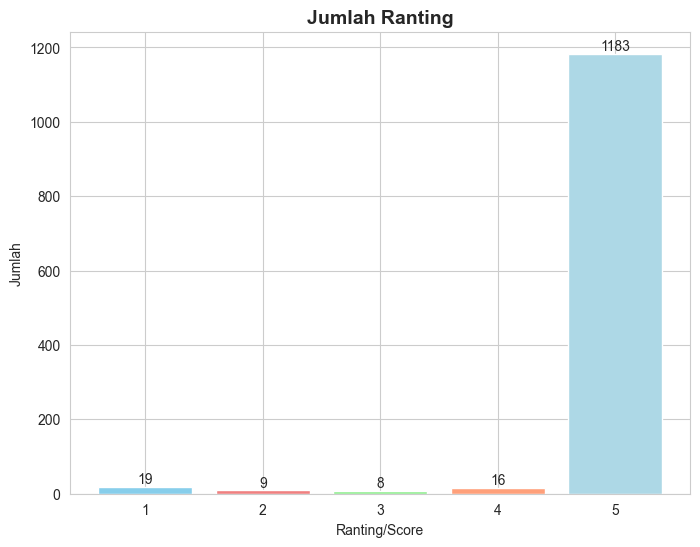

In [152]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()